In [91]:
# import libraries

import torch
import os
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

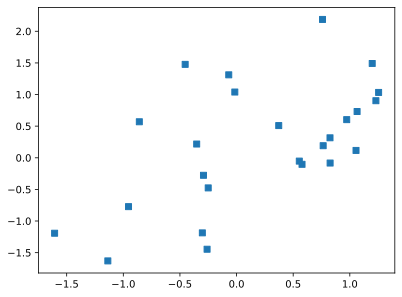

In [107]:
#data
N = 25
x = torch.randn(N,1)
y = x + torch.randn(N,1)

plt.plot(x,y, "s")
plt.show()

In [108]:
#model
ANNreg = nn.Sequential(
    nn.Linear(1,1),
    nn.ReLU(),
    nn.Linear(1,1)
)
ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [109]:
learningRate = 0.05
lossFun = nn.MSELoss()
optimiser = torch.optim.SGD(ANNreg.parameters(), lr = learningRate)

In [110]:
#training
epochs =200
losses = torch.zeros(epochs)
for epochi in range(epochs):
    #forward pass
    yHat = ANNreg(x)
    #loss
    loss = lossFun(yHat, y)
    losses[epochi] = loss
    #backprop
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Text(0.5, 1.0, 'Final Loss : 0.6326')

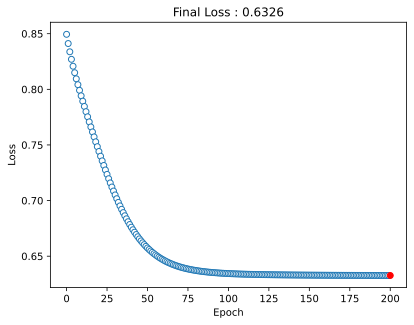

In [111]:
predictions = ANNreg(x)
lossMean = (predictions-y).pow(2).mean()
plt.plot(losses.detach(), "o", markerfacecolor = 'w')
plt.plot(epochs, lossMean.detach(), "ro")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(f"Final Loss : {round(lossMean.item(),4)}")

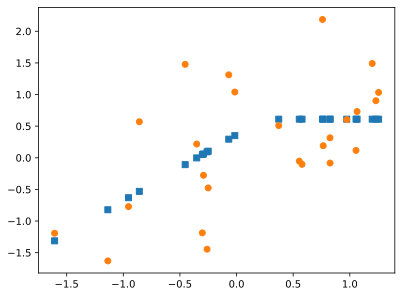

In [112]:

plt.plot(x,ANNreg(x).detach(), "s")
plt.plot(x,y, "o")